In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/root/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [7]:
phm_folder= "../datasets/phm/phm-2012-wt/"

motor = 'Bearing1_1'
X_train = phm_folder+'X_train_'+motor+'.npy' 
X_train = np.load(X_train)
X_train = np.moveaxis(X_train, 1, 3)

Y_train = phm_folder+'Y_train_'+motor+'.npy' 
Y_train = np.load(Y_train)

motor = 'Bearing1_2'
X_test = phm_folder+'X_train_'+motor+'.npy' 
X_test = np.load(X_test)
X_test = np.moveaxis(X_test, 1, 3)

Y_test = phm_folder+'Y_train_'+motor+'.npy' 
Y_test = np.load(Y_test)


In [8]:
X_test.shape

(871, 511, 99, 1)

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(511, 99, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 509, 97, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 254, 48, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 46, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 23, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 21, 64)       36928     
_________________________________________________________________
flatten (Flatten)            (None, 166656)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, pd.DataFrame((Y_train*10).astype(int)).values, epochs=10, 
                    validation_data=(X_train, pd.DataFrame((Y_train*10).astype(int)).values))

Train on 2803 samples, validate on 2803 samples
Epoch 1/10
2803/2803 [==============================] - 4s 1ms/sample - loss: nan - accuracy: 0.0999 - val_loss: nan - val_accuracy: 0.0999
Epoch 2/10
2803/2803 [==============================] - 4s 1ms/sample - loss: nan - accuracy: 0.0999 - val_loss: nan - val_accuracy: 0.0999
Epoch 3/10
2803/2803 [==============================] - 4s 1ms/sample - loss: nan - accuracy: 0.0999 - val_loss: nan - val_accuracy: 0.0999
Epoch 4/10
 800/2803 [=======>......................] - ETA: 1s - loss: nan - accuracy: 0.0862

KeyboardInterrupt: 

2803/1 - 1s - loss: nan - accuracy: 0.0000e+00


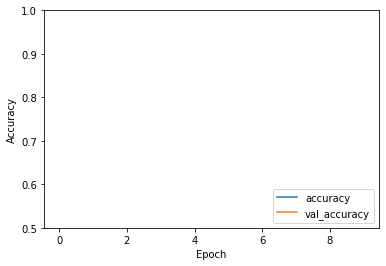

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_train,  Y_train, verbose=2)

In [20]:
(Y_test*10).astype(int)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2